# ARIMA (Autoregressive Integrated Moving Average) Model

This notebook implements the ARIMA (Autoregressive Integrated Moving Average) model for time series analysis and forecasting. The ARIMA model combines three key components:

- **Autoregression (AR)**: Uses the dependency between an observation and a number of lagged observations.
- **Differencing (I)**: Makes the time series stationary by removing trends and seasonality.
- **Moving Average (MA)**: Models the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The steps involved include:

- **Data Preprocessing**: Preparing the dataset for analysis.
- **Stationarity Testing**: Using the Dickey-Fuller test to check if the time series is stationary.
- **Model Fitting**: Applying the ARIMA model to capture both trend and noise in the data.
- **Forecasting**: Using the model to predict future values.
- **Evaluation**: Comparing the predicted values with the actual data to assess model performance.

The focus is on combining these three components effectively to model the time series data and forecast future values accurately.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Step 1 & 2: Loading the Dataset and Identifying Time Series Columns

I began by preparing the dataset and identifying the key columns for time series analysis and forecasting:

### Step 1: Loading the Dataset
- I used the `pandas` library to load the dataset from an Excel file located at `'../datasets/master_dataset/master_dataset.xlsx'`.
- The dataset was stored in the variable `data` for further processing and analysis.

### Step 2: Identifying Numeric Time Series Columns
- I selected the following numeric columns from the dataset for time series analysis:
  - **Clicks**: Represents the number of clicks recorded over time.
  - **Impressions**: Represents the number of impressions generated over time.
  - **Quantity**: Represents the quantity values over time, which is the primary target variable for forecasting.
- These columns were stored in a list called `time_series_columns` to enable easy iteration and analysis in subsequent steps.


In [2]:
# Step 1: Load the dataset
data = pd.read_excel('../datasets/master_dataset/master_dataset.xlsx')

# Step 2: Identify numeric time series columns
time_series_columns = ["Clicks", "Impressions", "Quantity"]

# Steps 3 to 9: Performing ARIMA Analysis

In this section, I analyzed each time series column, applied the ARIMA model, and forecasted future values step by step.

### Step 3: Looping Through Each Column
- I iterated over the columns `Clicks`, `Impressions`, and `Quantity` to analyze them individually.
- For each column:
  - I removed missing values using `.dropna()` to ensure the data was clean and ready for analysis.
  - I printed the first 5 rows of the column to get a quick look at its structure.

### Step 4: Visualizing the Time Series
- I plotted the time series data for each column to observe its trends, patterns, and any seasonality.
- The x-axis represents the `Day Index` (time), while the y-axis represents the column's values.
- This helped me understand how the data behaves over time and what challenges the model might face.

### Step 5: Testing for Stationarity
- I used the **Augmented Dickey-Fuller (ADF) Test** to check if the time series was stationary:
  - If the `p-value` was greater than 0.05, the data was non-stationary, so I applied **differencing** to remove trends and make it stationary.
  - If the `p-value` was less than or equal to 0.05, the data was already stationary, so no adjustments were needed.
- For non-stationary data, I computed the differenced series using `.diff()` and printed the first 5 rows to confirm the transformation.

### Step 6: Fitting the ARIMA Model
- I applied the ARIMA model to the stationary time series:
  - The model parameters `(p, d, q)` were set to `(1, 1, 1)` for this analysis. These values can be adjusted based on the dataset's behavior.
  - I trained the model using the `.fit()` method and printed the model summary to understand its performance and coefficients.

### Step 7: Making Predictions
- I used the trained ARIMA model to predict values within the dataset:
  - Predictions were made using the `.predict()` method for all time points, except for the initial lag.
  - I compared the **Actual** and **Predicted** values by combining them into a `pandas` DataFrame.
  - I displayed the first 5 rows of the comparison to review the results.

### Step 8: Forecasting Future Values
- I used the ARIMA model to forecast the next 5 values for each column:
  - The `.forecast()` method provided predictions for future time points based on historical patterns.
  - These forecasts gave me an idea of how the time series might behave in the near future.
  - I printed the forecasted values for clarity.

### Step 9: Visualizing the Forecast
- I plotted the original time series alongside the forecasted values to compare them visually:
  - The original series was shown in blue, while the forecasted values were highlighted in red.
  - This visualization made it easy to evaluate how well the model predicts future trends.


*** Analyzing column: Clicks ***

First 5 rows of Clicks:
 0    445
1    433
2    424
3    427
4    451
Name: Clicks, dtype: int64


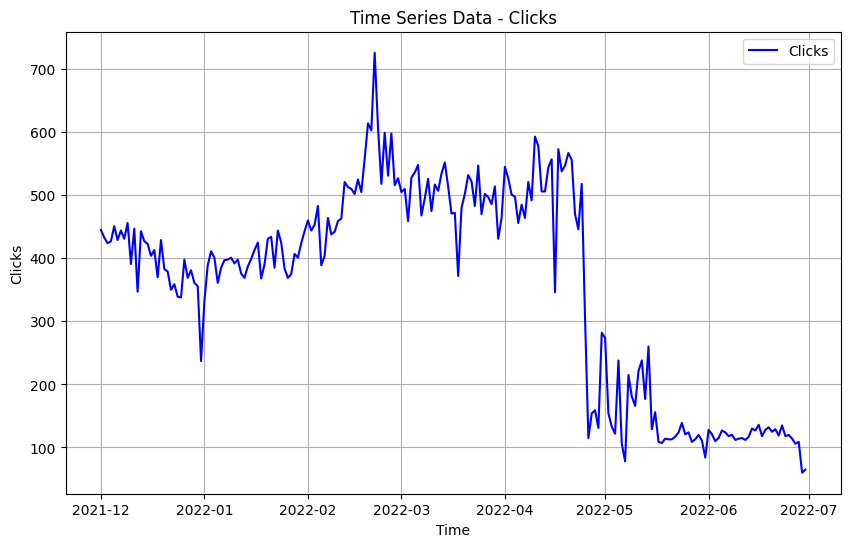

Dickey-Fuller Test Statistic: -0.8705717270828215
p-value: 0.797509057499528
The column: Clicks is non-stationary. Applying differencing...

First 5 rows of differenced Clicks:
 1   -12.0
2    -9.0
3     3.0
4    24.0
5   -22.0
Name: Clicks, dtype: float64
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                 Clicks   No. Observations:                  211
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1125.085
Date:                Wed, 27 Nov 2024   AIC                           2256.170
Time:                        00:28:44   BIC                           2266.211
Sample:                             0   HQIC                          2260.229
                                - 211                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts canno

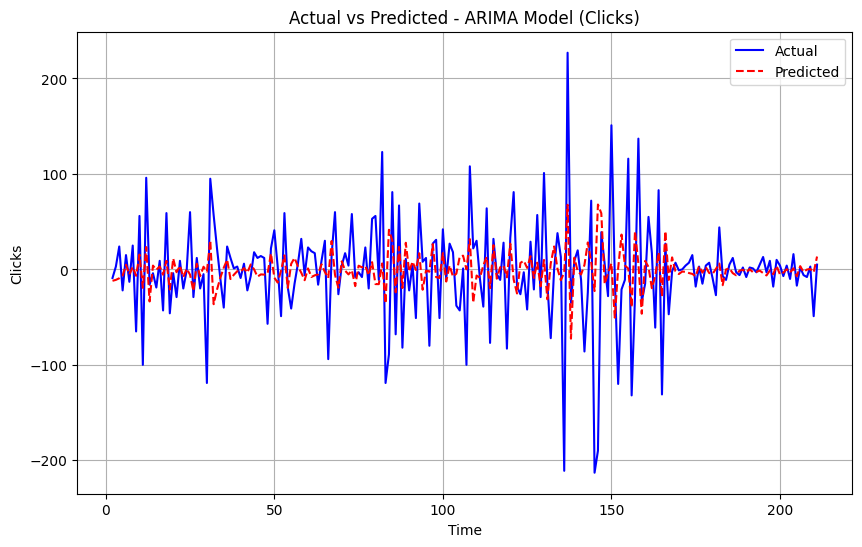


Forecasted Values for Clicks:
 211   -3.992149
212   -1.089039
213   -2.026306
214   -1.723710
215   -1.821403
Name: predicted_mean, dtype: float64


c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


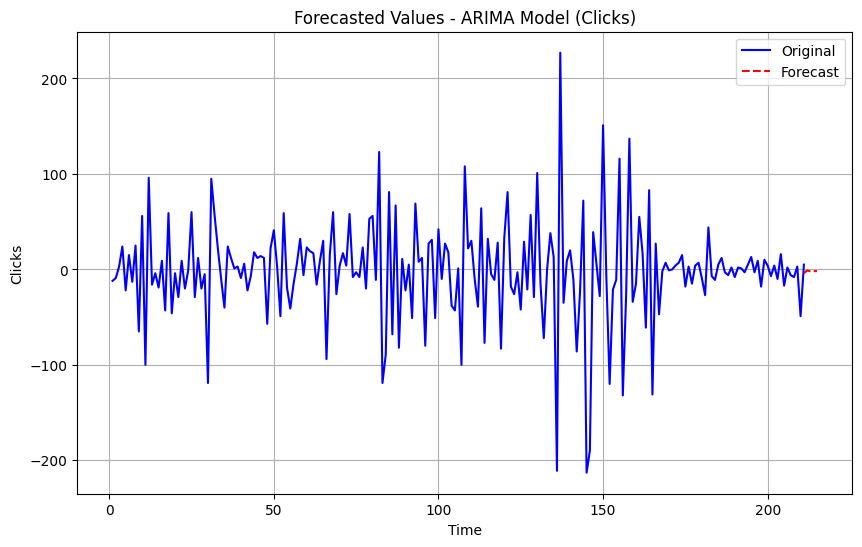


*** Analyzing column: Impressions ***

First 5 rows of Impressions:
 0    620
1    890
2    851
3    881
4    678
Name: Impressions, dtype: int64


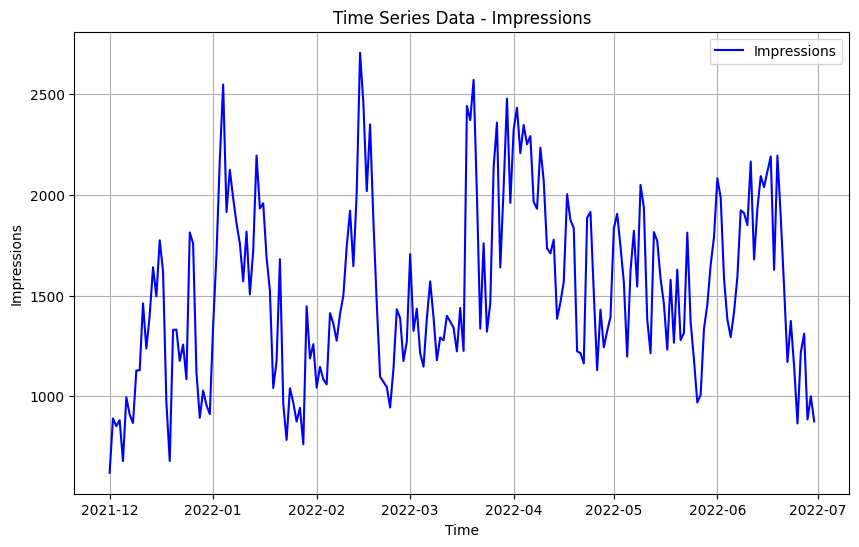

Dickey-Fuller Test Statistic: -5.6962061101258685
p-value: 7.863580125889645e-07
Impressions is stationary.
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:            Impressions   No. Observations:                  212
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1501.905
Date:                Wed, 27 Nov 2024   AIC                           3009.810
Time:                        00:28:44   BIC                           3019.866
Sample:                             0   HQIC                          3013.875
                                - 212                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7384      0.055     13.478      0.000       0.631       0.846
ma

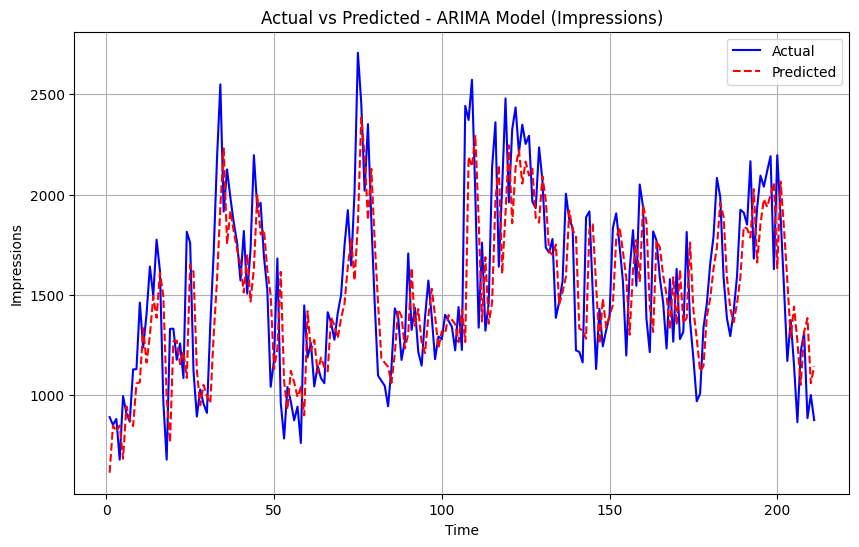


Forecasted Values for Impressions:
 212    1045.101734
213    1170.713153
214    1263.470753
215    1331.967490
216    1382.548823
Name: predicted_mean, dtype: float64


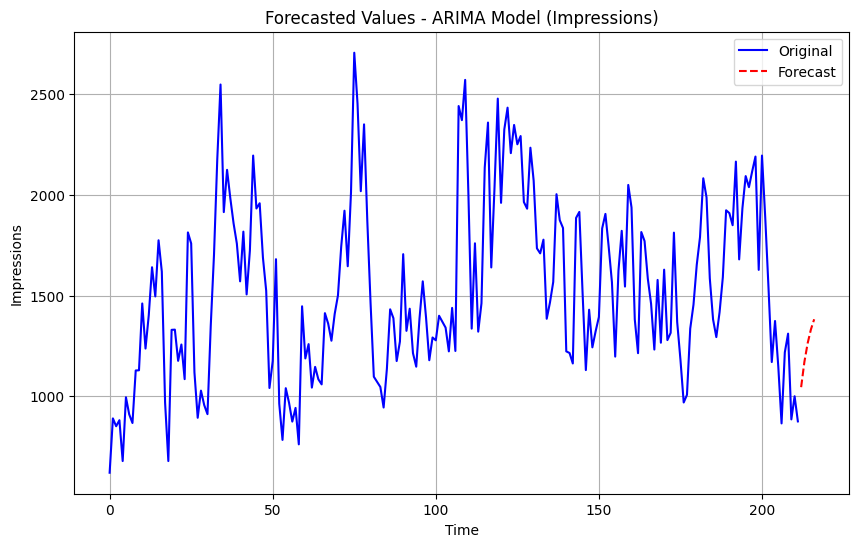


*** Analyzing column: Quantity ***

First 5 rows of Quantity:
 0    14
1    10
2    13
3    22
4    33
Name: Quantity, dtype: int64


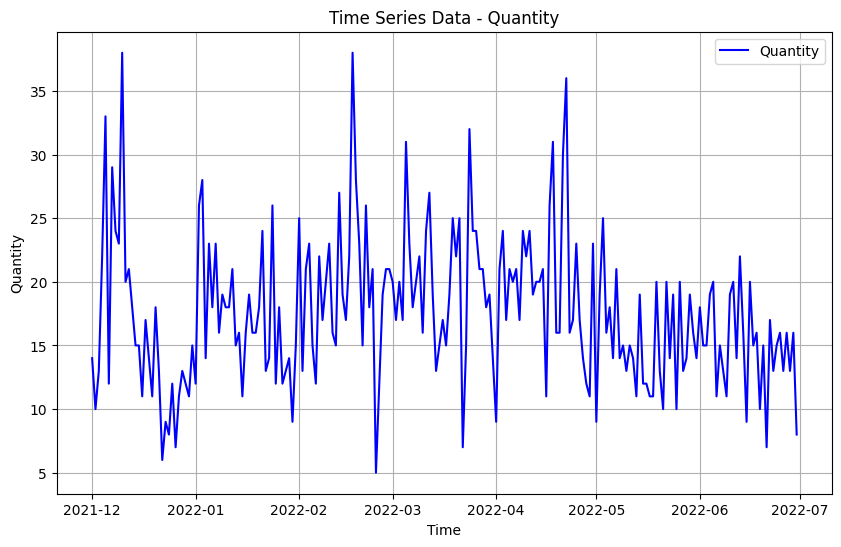

Dickey-Fuller Test Statistic: -4.445717448758575
p-value: 0.00024615679644112006
Quantity is stationary.
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  212
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -660.577
Date:                Wed, 27 Nov 2024   AIC                           1327.153
Time:                        00:28:44   BIC                           1337.209
Sample:                             0   HQIC                          1331.218
                                - 212                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1498      0.072      2.092      0.036       0.009       0.290
ma.L1

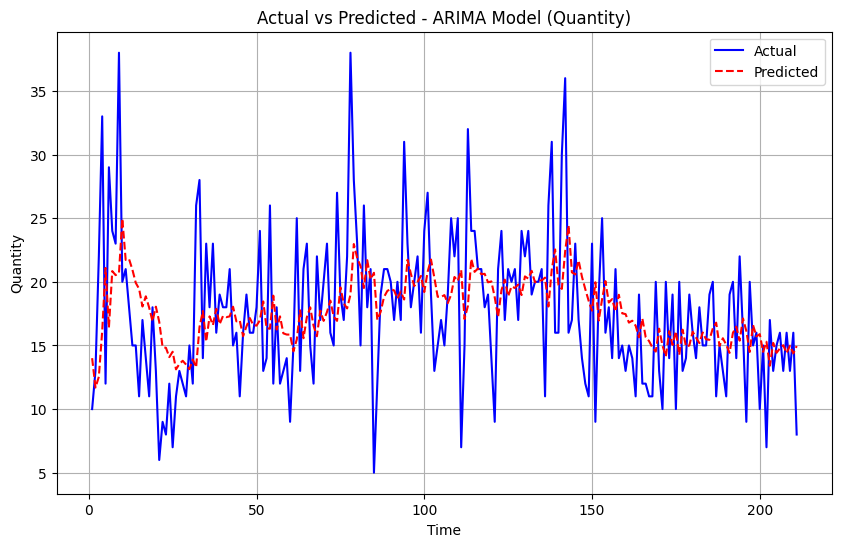


Forecasted Values for Quantity:
 212    13.181532
213    13.957626
214    14.073870
215    14.091281
216    14.093889
Name: predicted_mean, dtype: float64


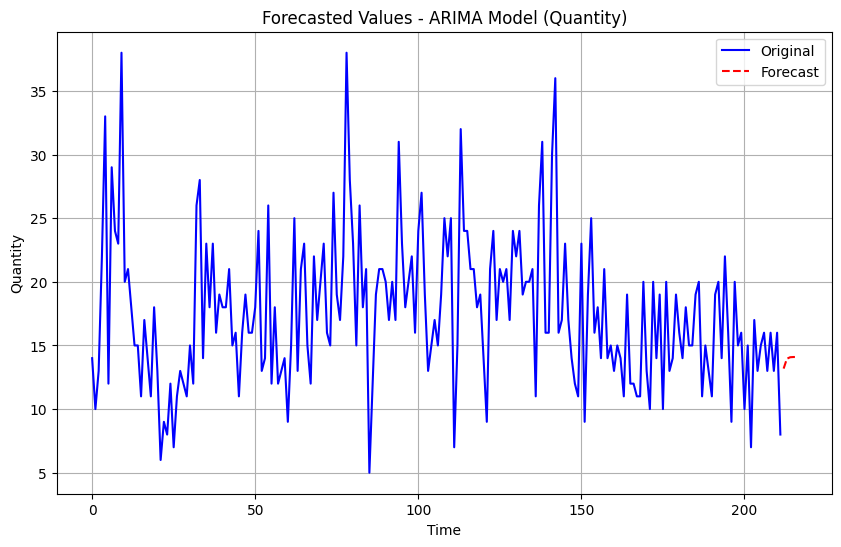

In [3]:
# Step 3: Loop through each column to conduct ARIMA Analysis
for column in time_series_columns:
    print(f"\n*** Analyzing column: {column} ***")
    time_series = data[column].dropna()  # To remove missing values

    # Display first few rows of the data
    print(f"\nFirst 5 rows of {column}:\n", time_series.head())

    # Step 4: Visualize the time series
    plt.figure(figsize=(10, 6))
    plt.plot(data["Day Index"], time_series, label=column, color="blue")
    plt.title(f"Time Series Data - {column}")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

    # Step 5: Check stationarity using the Dickey-Fuller test
    adf_test = adfuller(time_series)
    print(f"Dickey-Fuller Test Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")

    if adf_test[1] > 0.05:
        print(f"The column: {column} is non-stationary. Applying differencing...")
        time_series_diff = time_series.diff().dropna()  # Apply differencing to make stationary

        # Display first 5 rows of differenced series
        print(f"\nFirst 5 rows of differenced {column}:\n", time_series_diff.head())
    else:
        print(f"{column} is stationary.")
        time_series_diff = time_series

    # Step 6: Fit the ARIMA Model
    # Set ARIMA model parameters (p, d, q)
    p, d, q = 1, 1, 1  # Adjust based on model evaluation
    arima_model = ARIMA(time_series_diff, order=(p, d, q)).fit()

    # Print model summary
    print("ARIMA Model Summary:")
    print(arima_model.summary())

    # Step 7: Make predictions
    predictions = arima_model.predict(start=1, end=len(time_series_diff) - 1)

    # Combine actual and predicted values for comparison
    comparison = pd.DataFrame({
        "Actual": time_series_diff[1:].values,
        "Predicted": predictions
    })

    # Display a few rows of the comparison
    print(f"\nFirst 5 rows of Actual vs Predicted for {column}:\n", comparison.head())

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.plot(comparison["Actual"], label="Actual", color="blue")
    plt.plot(comparison["Predicted"], label="Predicted", color="red", linestyle="--")
    plt.title(f"Actual vs Predicted - ARIMA Model ({column})")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

    # Step 8: Forecast future values
    forecast_steps = 5  # Number of steps to forecast
    forecast = arima_model.forecast(steps=forecast_steps)

    print(f"\nForecasted Values for {column}:\n", forecast)

    # Step 9: Display forecast results
    future_index = range(len(time_series_diff), len(time_series_diff) + forecast_steps)
    plt.figure(figsize=(10, 6))
    plt.plot(time_series_diff, label="Original", color="blue")
    plt.plot(future_index, forecast, label="Forecast", color="red", linestyle="--")
    plt.title(f"Forecasted Values - ARIMA Model ({column})")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()